<a href="https://colab.research.google.com/github/JulioCezar1111/Projeto23/blob/main/Perceptron_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar Bibliotecas**

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Para arvore de decisão
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import pydotplus
import torch

# **Importar Dataset**

In [ ]:
'''!pip3 install wget
!wget https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/05/titanic_test.csv
!wget https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/05/titanic_train.csv
!wget https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/05/test_y.csv'''

'!pip3 install wget\n!wget https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/05/titanic_test.csv\n!wget https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/05/titanic_train.csv\n!wget https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/05/test_y.csv'

# **Importar para dataframe(pandas)**

In [ ]:
train_df = pd.read_csv('/content/titanic_train.csv')
test_df = pd.read_csv('/content/titanic_test.csv')

# **Visualizar o dataframe**

In [ ]:
display(train_df.head())
display(test_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **Informação do dataframe**

In [ ]:
display(train_df.info())
print('=================')
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

# **Tratameto do dataframe**

In [ ]:
# Excluir colunas não necessarias
dropned_test_df = test_df.dropna()

train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)


# para transformar em numeros gategorias
le = LabelEncoder() # para transformar em numero 
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.fit_transform(test_df['Sex'])

# Para mais que uma opção na coluna 
# Cria se colunas para as opções
enc = OneHotEncoder(handle_unknown = 'ignore')

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(train_df[['Embarked']]).toarray())
train_df = train_df.iloc[: , :-1]
pd.concat([train_df, one_hot_encond_temp], axis=1, ignore_index=False)

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(test_df[['Embarked']]).toarray())
test_df = test_df.iloc[: , :-1]
pd.concat([test_df, one_hot_encond_temp], axis=1, ignore_index=False)

# Exluir linhas nulas
train_df.dropna(inplace = True)
test_df.dropna(inplace = True)




# **Separar as features e etiqueta**

In [ ]:
XTrain = train_df.iloc[: , 1 : ]
yTrain = train_df.iloc[: , 0]

XTest = test_df

XTrain

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


# **Normalizar os dados das colunas**

In [ ]:
sc = StandardScaler()
sc.fit(XTrain)

XTrain = sc.transform(XTrain.values)
XTest = sc.transform(XTest.values)

XTrain

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.91123237,  0.75905134, -0.53037664,  0.52457013, -0.50589515,
        -0.51897787],
       [-1.47636364, -1.31743394,  0.57183099,  0.52457013, -0.50589515,
         0.69189675],
       [ 0.91123237, -1.31743394, -0.25482473, -0.55170307, -0.50589515,
        -0.50621356],
       ...,
       [-1.47636364, -1.31743394, -0.73704057, -0.55170307, -0.50589515,
        -0.08877362],
       [-1.47636364,  0.75905134, -0.25482473, -0.55170307, -0.50589515,
        -0.08877362],
       [ 0.91123237,  0.75905134,  0.15850313, -0.55170307, -0.50589515,
        -0.50952283]])

# **Rede Neural**

* usa SGD (comentar que atualiza os w para cada amostra e "sorteia" as amostras, permitindo melhor convergência na busca pelo minimo global; fora que permite online learning)

* o batch gd (igual do vídeo passado) é bom para bases pequenas, mas ruim para bases grandes principalmente 
devido ao estouro de memória, fora que converge mais rápido

* minibatch tem características hibridas

In [ ]:
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0) 

ppn.fit(XTrain, yTrain)


Perceptron(eta0=0.1)

# **Testar o modelo**

In [ ]:
from matplotlib.transforms import Transform

y_pred = ppn.predict(XTest)

y_test = pd.read_csv('/content/test_y.csv')
y_test.drop(dropned_test_df['PassengerId'].index, inplace=True)
y_test = y_test["Survived"].values

y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

# **Matrix de confusão**

Matriz de Confusão sem normalizacão 
[[151  72]
 [ 68  40]]


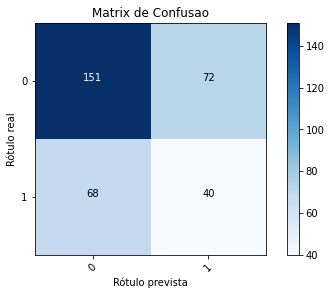

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

nome_classes = ppn.classes_
matrix_confusao = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes = nome_classes,
                      title='Matrix de Confusao')

# **Accuracy**

In [ ]:
print(accuracy_score(y_test, y_pred).round(2))

print(classification_report(y_test, y_pred))

0.58
              precision    recall  f1-score   support

           0       0.69      0.68      0.68       223
           1       0.36      0.37      0.36       108

    accuracy                           0.58       331
   macro avg       0.52      0.52      0.52       331
weighted avg       0.58      0.58      0.58       331

